# Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [30]:
datas = pd.read_csv('smoke_detection_iot.csv')
datas.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Exploratory Data Analysis(EDA)

In [31]:
datas.shape

(62630, 16)

In [32]:
datas.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [33]:
datas.isnull().sum() # We don't have any null wariables.(So,you can pass the missing values handling part.)

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

# Correlation

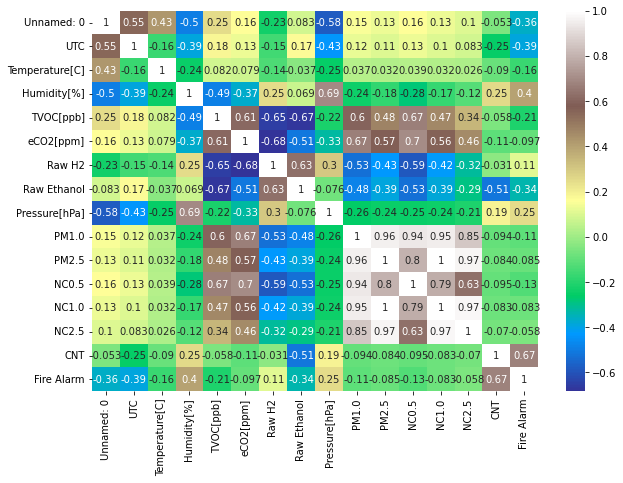

In [34]:
sbn.heatmap(datas.corr(),annot = True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

# Feature Selection

In [35]:
X = datas.iloc[:,2:14] # We don't need Unnamed:0,UTC and CNT parts of the datas.(CNT=Sİmple count,
# UTC - The time when experiment was performed.)
X # Independent variables.

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [36]:
Y = datas.iloc[:,15]
Y # Dependent variables.

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

# Outlier Detection

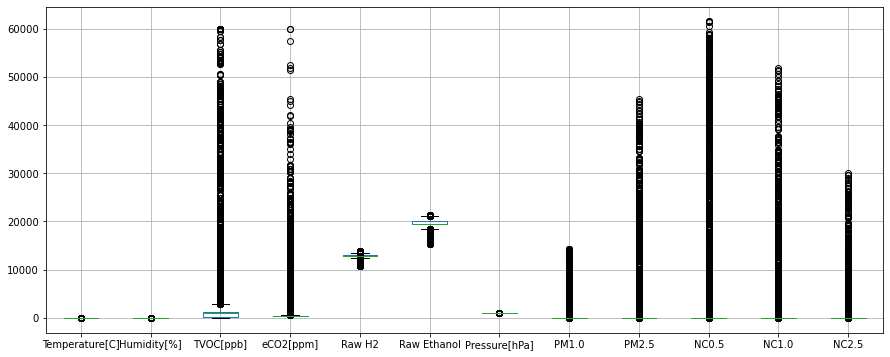

In [37]:
X.boxplot(figsize = (15,6))
plt.show()

C:\Users\User\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


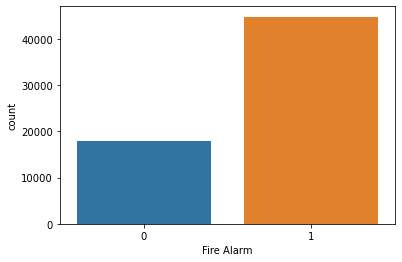

In [38]:
sbn.countplot(Y)
plt.show()

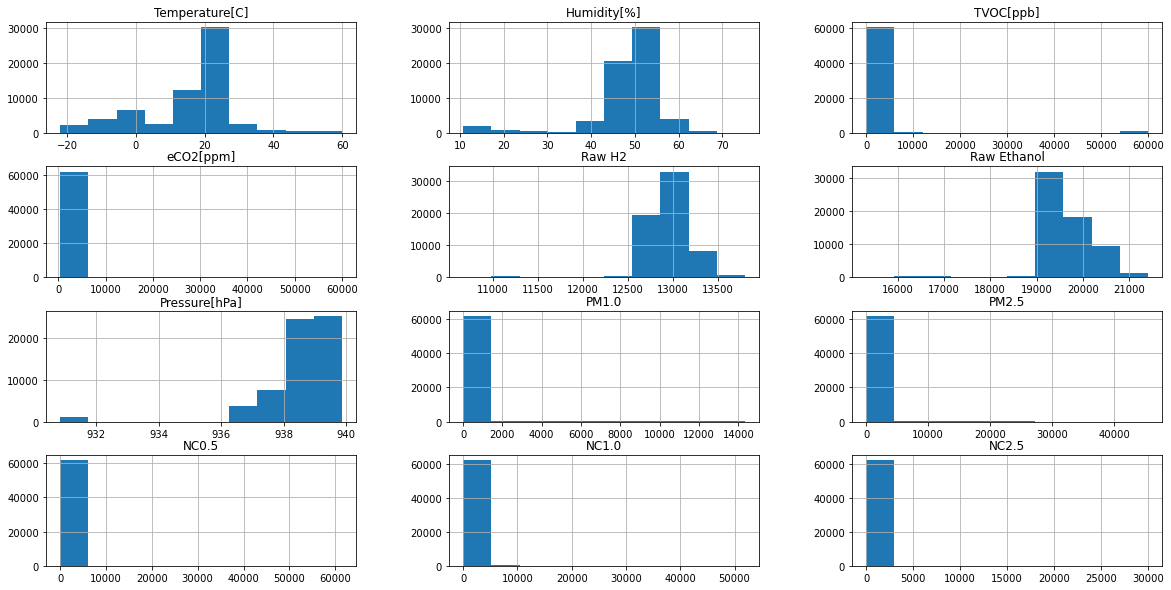

In [39]:
X.hist(figsize=(20,10))
plt.show()

In [40]:
# All dependent and independent variables were identified and unnecessary features were removed from the dataset.
#Now we can split and scale our data.

# Spliting Data

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state=1)

In [42]:
x_train.shape

(41962, 12)

In [43]:
x_test.shape

(20668, 12)

In [44]:
y_train.shape

(41962,)

In [45]:
y_test.shape

(20668,)

# Data Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [48]:
x_train

array([[2.82462778e-01, 6.66149550e-01, 2.20833333e-02, ...,
        2.18275161e-04, 4.03161495e-05, 1.56528723e-06],
       [5.69074933e-01, 6.54979832e-01, 2.16166667e-02, ...,
        2.40558095e-04, 4.44190352e-05, 1.73180715e-06],
       [2.11898950e-01, 7.09121936e-01, 4.41666667e-03, ...,
        5.28609742e-05, 9.74676142e-06, 3.66343820e-07],
       ...,
       [4.89431291e-01, 6.56065777e-01, 1.77833333e-02, ...,
        2.57961554e-04, 4.76358517e-05, 1.86502308e-06],
       [5.05491823e-01, 6.12317716e-01, 5.33333333e-03, ...,
        3.02527421e-05, 5.58608856e-06, 2.33127885e-07],
       [2.29716866e-01, 4.65404902e-02, 2.30166667e-02, ...,
        8.11619265e-05, 1.49861272e-05, 5.99471706e-07]])

In [49]:
x_test

array([[7.20390720e-04, 6.35587962e-01, 2.21500000e-02, ...,
        2.07725162e-04, 3.87055224e-05, 1.52074869e-06],
       [5.83638584e-01, 5.96338815e-01, 3.35000000e-03, ...,
        2.06260016e-04, 3.84332222e-05, 1.52074869e-06],
       [1.94468864e-01, 6.98107353e-01, 3.65000000e-03, ...,
        8.90483257e-05, 1.65908596e-05, 6.42093891e-07],
       ...,
       [4.76312576e-01, 5.94942600e-01, 1.66666667e-05, ...,
        4.88382042e-05, 9.10260527e-06, 3.71738569e-07],
       [5.27472527e-01, 5.79118833e-01, 8.83333333e-04, ...,
        2.58354100e-04, 4.81387779e-05, 1.89248726e-06],
       [2.11611722e-01, 4.74092460e-01, 1.40000000e-03, ...,
        1.96817963e-04, 3.66632712e-05, 1.45315986e-06]])

# Model Training and Model Evaluation

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Logistic Regression

In [50]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train,y_train)
y_pred_log_reg = log_reg.predict(x_test)

C:\Users\User\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
y_pred_log_reg

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [70]:
accuracy_score(y_pred_log_reg,y_test)

0.8757983355912522

In [72]:
confusion_matrix(y_pred_log_reg,y_test)

array([[ 3899,   524],
       [ 2043, 14202]], dtype=int64)

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy') # Also you can try 'gini' parameter according to 'entropy'.
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

In [53]:
y_pred_dtc

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [73]:
accuracy_score(y_pred_dtc,y_test)

0.9958389781304432

In [74]:
confusion_matrix(y_pred_dtc,y_test)

array([[ 5934,    78],
       [    8, 14648]], dtype=int64)

# Support Vector Classifier(SVC)

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf') # The kernel can be polynomial etc.
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

In [57]:
y_pred_svc

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [75]:
accuracy_score(y_pred_svc,y_test)

0.9091348945229341

In [76]:
confusion_matrix(y_pred_svc,y_test)

array([[ 4066,     2],
       [ 1876, 14724]], dtype=int64)

# K-Nearest Neighborhood (KNN)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski')
# Minkowski is a kind of distance measurement formula.
# n_neighbors = Number of neighbors (You can change it.)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [59]:
y_pred_knn

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [77]:
accuracy_score(y_pred_knn,y_test)

0.9985000967679505

In [78]:
confusion_matrix(y_pred_knn,y_test)

array([[ 5921,    10],
       [   21, 14716]], dtype=int64)

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10,criterion='entropy')
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [61]:
y_pred_rfc

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [87]:
accuracy_score(y_pred_rfc,y_test)

0.9996129281981808

In [80]:
confusion_matrix(y_pred_rfc,y_test)

array([[ 5938,     4],
       [    4, 14722]], dtype=int64)

# Naive Bayes(Gaussian) 

In [63]:
from sklearn.naive_bayes import GaussianNB # You can try Multinomial Naive Bayes,Bernoulli Naive Bayes etc.
gnb = GaussianNB() 
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)

In [64]:
y_pred_gnb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [81]:
accuracy_score(y_pred_gnb,y_test)

0.763741048964583

In [82]:
confusion_matrix(y_pred_gnb,y_test)

array([[ 1406,   347],
       [ 4536, 14379]], dtype=int64)